# Random Variables

You can define a **random variable** $X$ to be a function from a sample space $\Omega$ to the reals $\mathbb{R}$. 

```{note} Remark
What I like to think of a *random variable* is a function from the events of a sample space to the reals, or in other words rewriting event names you're interested using numbers.
```

We tend to classify random variables in two classes: Discrete and Continuous.

```{image} ./assets/discr_cont.png
:alt: disc_cont
:width: 800px
:align: center
```

What matters is that if we have a discrete random variable, we can count things (things may be infinite, but still listable), as there is a jump between each possible value of the random variable, and addition is the usual summation:

$\{5\leq X<8\} = \{X=5.5\} \cup \{X=6.3\} \cup \{X=7.9\}$

When we have a continuous variable, we describe them mostly in terms of intervals and we trace outcomes in an event rather than counting the outcomes one by one. For most of the continuous random variables, we'll be able to use techniques of calculus. For example, addition becomes definite integrals.

#### Baby example

Toss a coin twice and label the outcomes by the number of heads.  
Then our random variable $X$ takes the possible values $\{0,1,2\}$, where

 $X=k$ | event 
 --: | --: 
 $X=0$ | $\{TT\}$ 
 $X=1$ | $\{HT,TH\}$ 
 $X=2$ | $\{HH\}$ 

Then probabilities can be assigned to those events. A **probability distribution** is a function that assigns a probabilities to events. In the context of discrete random variables, we call the probability distributions as **probability mass functions** and in the context of continuous random variables, we call the probability distributions as **probability density functions**.

#### Back to baby example

If a coin is assumed to be fair, then the probability mass function for the variable $X$ we defined above can be written as

$P(X=0)=\frac{1}{4}$, $P(X=1)=\frac{1}{2}$ and $P(X=2)=\frac{1}{4}$

```{dropdown} Remark
I think it's important to have a temporal/causal hieararchy:  
- "the chance experiment" comes before "knowing all possible outcomes",
- "knowing all possible outcomes" comes before "grouping some outcomes and defining events",
- "defining events" comes before "using numerical values as labels of events, i.e. defining a random variable",
- "defining a random variable" comes before "assigning probabilities"

We can use *histograms* to represent probability mass functions visually.  
The histogram for our baby example looks like:

```{image} ./assets/pmf_baby_exm.png
:alt: baby_pmf
:width: 400px
:align: center
```

## (Popular) Discrete Random Variables

You can find a quite comprehensive list of random variables and their probability distributions (both discrete and continuous) on this nice wikipedia page: <wiki:List_of_probability_distributions>.  
A probability distribution is

We'll be interested in a few common discrete random variables so that we can use them in future examples:

Name | Experiment | Random variable | $P(X=k)$
--- | --- | --- | ---
[Uniform](https://en.wikipedia.org/wiki/Discrete_uniform_distribution) | Pick a random number from among $\{1,2,3,\dots,n\}$ | $X=$ the number you picked | $P(X=k)=\frac{1}{n}$
[Bernoulli trial](https://en.wikipedia.org/wiki/Bernoulli_distribution) | Toss a coin. |  $X=1$, for heads and $X=0$ for tails. | $P(X=1)=p$, $P(X=0)=(1-p)$
[Binomial random variable](https://en.wikipedia.org/wiki/Binomial_distribution) | Repeat a Bernoulli trial $n$ times. | $X=$ the number of heads you observe | $P(X=k)={n \choose k}p^k(1-p)^{n-k}$ 
[Geometric random variable](https://en.wikipedia.org/wiki/Geometric_distribution) | Repeat Bernoulli trials until you get a heads. | $X=$ number tosses you observe. | $P(X=k)=(1-p)^{k-1}p$

```{dropdown} Remark
One important thing we can check to make sure the probability mass functions are defined correctly is they need to add up to the probability of the sample space, which equals to one:  
- (Discrete) uniform distribution: $\sum_{k=1}^n P(X=k)=\sum_{k=1}^n \frac{1}{n}=n\cdot \frac{1}{n}=1$.
- Bernoulli distribution: $\sum_{k=0}^1 P(X=k) = p + (1-p) = 1$.
- Binomial distribution: $\sum_{k=1}^n P(X=k) = \sum_{k=1}^n {n \choose k}p^k(1-p)^{n-k}=1$ (exc.)
- Geometric distribution: $\sum_{k=1}^{\infty} P(X=k) = \sum_{k=1}^{\infty} (1-p)^{k-1}p = p\sum_{k=1}^{\infty} (1-p)^{k-1} = p\sum_{k=0}^{\infty}(1-p)^k=p\cdot \frac{1}{1-(1-p)}=1$ (some calc 2 is happening here!)
```

Once we have a random variable and its probability mass/density function, we can compute some scalars that summarize some important aspects of our random variable.  
Two of them are then to be very significant: The expected value and the variance of the random variable.

## Expected Value of a (Discrete) Random Variable

The **expected value** (or **mean**) of a random variable $X$ is defined to be as a weighted sum.  
Each possible value of the random variable gets to have its probability as its weight:

$$E[X] = \sum_{k} k\cdot P(X=k)$$

#### Back to baby example

If we have a fair coin ($p=\frac{1}{2}$), then the expected value of the variable $X$ in our baby example becomes:

$$
    \begin{aligned}
    E[X] & = \sum_{k} k\cdot P(X=k) \\
         & = 0\cdot P(X=0) + 1\cdot P(X=1) + 2\cdot P(X=2) \\
         & = 0\cdot \frac{1}{4} + 1\cdot \frac{1}{2} + 2\cdot \frac{1}{4} \\
         & = 1
    \end{aligned}

$$

What this computation gives us is that if we toss a fair coin twice, we expect to see 1 heads on average.  

```{note} Remark
I find the geometric interpretation of the expected value very illuminating:
```

---

```{dropdown} Python
I will try to draw make the visualizations using `Python` (maybe later I can add the `R` versions, or even better, you can send the `R` versions in the Telegram group chat and we'd have better notes.)  
You can ignore the Python code for the moment or try to figure out how it works. More important are the graphs.
```

---

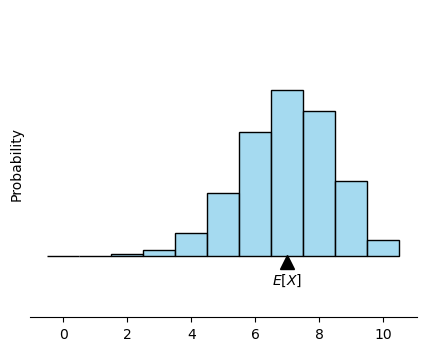

In [27]:
# import the necessary packages to compute and visualize in python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# parameters for the binomial distribution
n = 10
p = 0.7

# generate binomial distribution
data = np.random.binomial(n, p, 10000)

# plot histogram using seaborn
plt.figure(figsize=(5, 4))
sns.histplot(data, 
             bins=np.arange(-0.5, n+1.5, 1), 
             kde=False, stat='probability', 
             color='skyblue', 
             edgecolor='black')

# calculate expected value E[X] = np
expected_value = n * p

# add a triangle and label it by E[X]
plt.plot(expected_value, -0.01, marker='^', markersize=10, color='black')
plt.text(expected_value, -0.04, '$E[X]$', ha='center', va='center')

# cleaning the graph, we don't need the numbers
plt.ylim(-0.1, 0.4)  
plt.tick_params(left=False, bottom=True, labelleft=False, labelbottom=True)
sns.despine(left=True, bottom=False)

plt.show()

The expected value is a horizontal value on the histogram of a random variable such that the histogram stays on balance and won't tilt (clockwise or counterclockwise) if you put a pivot right at $E[X]$.  

```{dropdown} (General Culture: Moments of a distribution)
If you remember some basic physics of mechanics, you'd see that the computation of $E[X]$ looks like a moment computation.
Expected value is the first moment of a distribution. For more about moments of a distribution (optional for us): [Moment](https://en.wikipedia.org/wiki/Moment_(mathematics)).
Also a quick remark, the zeroth moment is always 1 for a probability distribution, the second moment after centralizing is the variance etc.
```

You can think of removing the locations of the horizontal values on a distribution via some other function $f$.  
For example $f(k)=2k+1$ would move the original values of the random variable the following way: stretches away from horizontal middle by 2 and then shifts to right by 1.

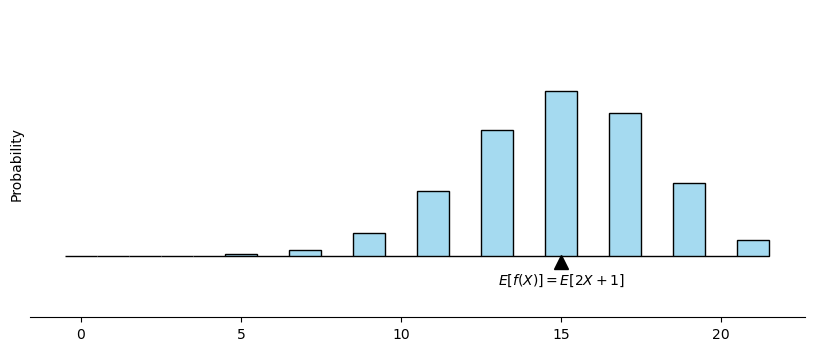

In [26]:
# import the necessary packages to compute and visualize in python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# parameters for the binomial distribution
n = 10
p = 0.7

# generate binomial distribution
data = 2*np.random.binomial(n, p, 10000)+1

# plot histogram using seaborn
plt.figure(figsize=(10, 4))
sns.histplot(data, 
             bins=np.arange(-0.5, 2*n+2.5, 1), 
             kde=False, stat='probability', 
             color='skyblue', 
             edgecolor='black')

# calculate expected value E[X] = np
expected_value = 2*n * p+1

# add a triangle and label it by E[X]
plt.plot(expected_value, -0.01, marker='^', markersize=10, color='black')
plt.text(expected_value, -0.04, '$E[f(X)] = E[2X+1]$', ha='center', va='center')

# cleaning the graph, we don't need the numbers
plt.ylim(-0.1, 0.4)  
plt.tick_params(left=False, bottom=True, labelleft=False, labelbottom=True)
sns.despine(left=True, bottom=False)

plt.show()

Note that all that happening is, the same events are now labeled by different numbers.  The events stay the same, hence their probabilities stay the same. The only thing that changes is how we labeled them.  
So, based on precalculus ideas, we have the following definition:  

$$E[f(X)]=\sum_{k}f(k)\cdot P(X=k)$$

We call this the expected value of the function $f$.

Hence using a geometric argument using the transformation of the horizontal axis, or using the algebraic definition of the expected value of a function, we can easily prove the following property:

$$E[aX+bY]=aE[X]+bE[Y]$$


However, expected values are not multiplicative, i.e. $E[XY]\neq E[X]E[Y]$, unless the random variables $X$ and $Y$ are independent.

 Two (discrete) random variables $X$ and $Y$ are independent if 

$$P(X=k,Y=l)=P(X=k)\cdot P(Y=l)$$

for any $k,l$, where $P(X=k, Y=l)$ denotes the intersection event of the events $X=k$ and $Y=l$.

```{dropdown} Another baby example
Toss a coin twice.  
- Let $X:=$ the number of heads (0, 1, or 2) in two tosses.  
Let $Y=1$ if the second toss is heads, and zero otherwise.  
Then $X$ and $Y$ are dependent.

- Let $X:=$ if the first toss is tails, and zero otherwise.  
Let $Y=1$ if the second toss is heads, and zero otherwise.  
Then $X$ and $Y$ are independent.
```


If two random variables are independent, then we have: $E[XY]=E[X]\cdot E[Y]$

The difference $E[XY]-E[X]E[Y]$ is called covariance of $X$ and $Y$, and the covariance of two independent random variables is zero if the variables are independent:

```{dropdown} Proof
$$
    \begin{align*}
        E[XY] & =\sum_{k,l} k\cdot l\cdot P(XY=kl) \\
              & \stackrel{\textrm{always}}{=}\sum_{k}\sum_{l} k\cdot l \cdot P(X=k,Y=l) \\
              & \stackrel{\textrm{independence}}{=}\sum_{k}\sum_{l} k\cdot l\cdot P(X=k)P(Y=l) \\ 
              & = \sum_{k}k\left(\sum_{l} l\cdot P(Y=l)\right)P(X=k) \\
              & =\sum_{k}k\left(E[Y]\right)P(X=k) \\
              & =E[Y]\sum_{k}k\cdot P(X=k), \textrm{ as $E[Y]$ is just a constant, and doesn't depend on $k$,} \\
              & = E[Y]E[X]
    \end{align*}
$$
```

However, the converse is not true:  
If $Cov(X,Y)\stackrel{def}{=}E[XY]-E[X]E[Y]$, $X$ and $Y$ be still dependent.

```{dropdown} Counterexample
Let $P(X=1)=P(X=-1)=0.3$ and $P(X=2)=P(X=-2)=0.2$. Note the since the probability mass function of $X$ is symmetric, $E[X]=0$ (exc.: or compute by hand).  
Let $Y=X^2$. Then $E[Y]=1\cdot 0.6 + 4\cdot 0.4=2.2 >0$.  
Note that $X$ and $Y$ are not independent random variables, as for example $P(X=1,Y=1)=0.3 \neq 0.3 \cdot 0.6 = P(X=1)\cdot P(Y=1)$, as $X=1$ is a subset of $Y=1$.  
However, $E[XY]=E[X^3]=0=0\cdot 2.2 = E[X]E[Y]$, since $X^3$ is again a symmetric discrete random variable (exc.: or compute by hand).
```

### Conditional expectance

A very useful idea is the **[law of total expectation](https://en.wikipedia.org/wiki/Law_of_total_expectation)**:

$$ E[X]=E[E[X|Y=l]] $$

#### Example (law of total expectation)

Assume we have three coins with probability of getting heads 0.2, 0.5 and 0.7, respectively.  
The experiment consists of 
- picking a coin with $P(Y=1)=0.3$, $P(Y=2)=0.5$, $P(Y=3)=0.2$, where $Y$ denotes the coin number,  
- and tossing the coin twice.  

Let $X$ is defined to be the number of heads observed.

```{image} ./assets/law_of_total_E.png
:alt: total_law
:width: 600px
:align: center
```

$$
    \begin{align*}
    E[X] & = E[E[X|Y=l]] \\
         & = E[2p_i] \\
         & = 0.3 \cdot (2\cdot 0.2) + 0.5 \cdot (2 \cdot 0.5) + 0.2\cdot (2\cdot 0.7) \\
         & = 0.9
    \end{align*}
$$